In [1]:
## Library
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import plot_model

import matplotlib.pyplot as plt
import random

In [8]:
## Load Mnist Data
(X_train, y_train),(X_test, y_test) = mnist.load_data()
print(f'Train Shape: {X_train.shape}')
print(f'Test Shape: {X_test.shape}')

Train Shape: (60000, 28, 28)
Test Shape: (10000, 28, 28)


## Show Data

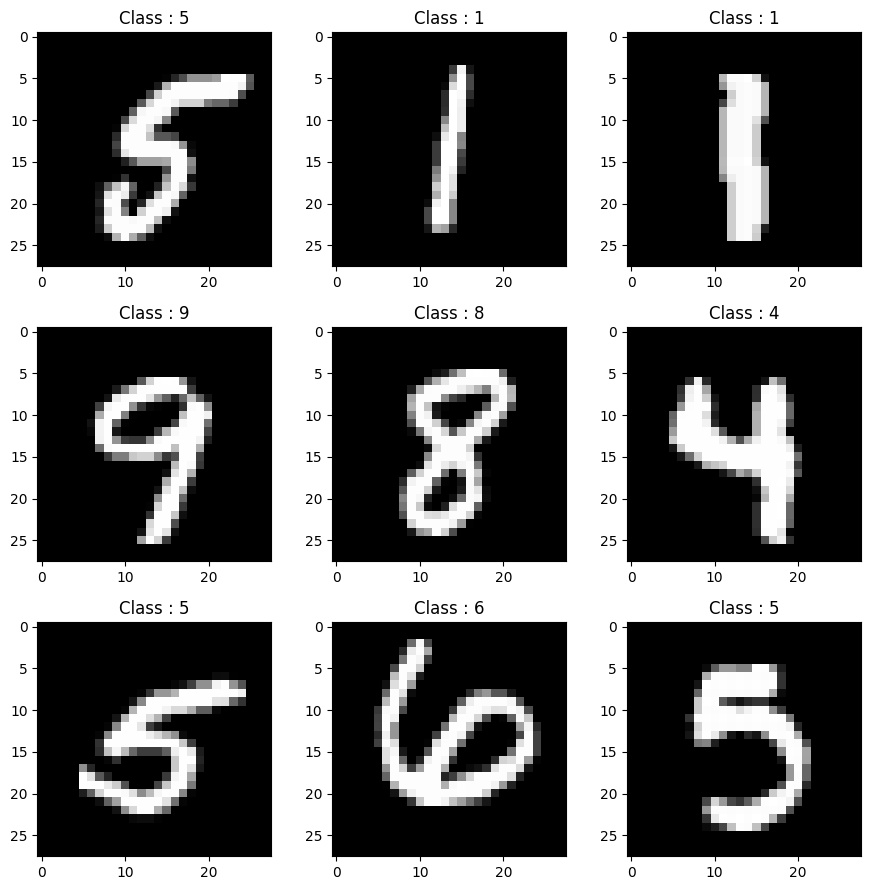

In [ ]:

plt.rcParams['figure.figsize'] = (9,9)

for i in range(9):
    plt.subplot(3,3,i+1)
    ## generate random number
    num = random.randint(0, len(X_train))
    ## show gray image as Mnist data
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    ## Class image as Mnist data
    plt.title("Class : " + str(y_train[num]))

plt.tight_layout()

## Normalize Data

In [10]:
## reshape Data (28,28) => (28,28,1)
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

print(f'Train Shape: {X_train.shape}')
print(f'Test Shape: {X_test.shape}')

Train Shape: (60000, 28, 28, 1)
Test Shape: (10000, 28, 28, 1)


In [11]:
## Categorical(one_hot) on Label
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [12]:
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train /= 255
X_test /= 255

## Model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                589888    
                                                      

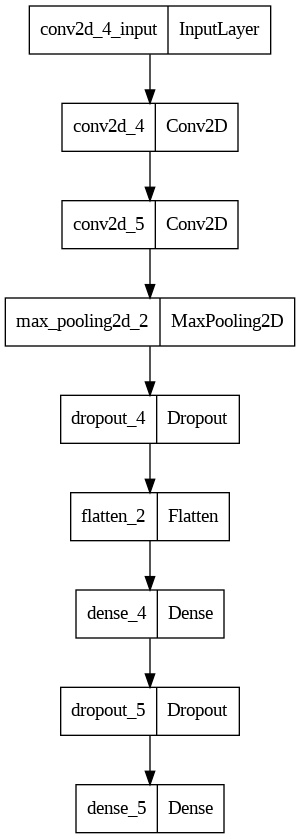

In [21]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

## information model
model.summary()

## show model
plot_model(model)

In [22]:
## complie model
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
## fit data on model
hist = model.fit(X_train, y_train,batch_size=64,epochs=20,validation_data=(X_test, y_test))
print("The model has successfully trained")

Epoch 1/20
938/938 [==============================] - 9s 7ms/step - loss: 0.3018 - accuracy: 0.9092 - val_loss: 0.0638 - val_accuracy: 0.9795
Epoch 2/20
938/938 [==============================] - 6s 6ms/step - loss: 0.1309 - accuracy: 0.9615 - val_loss: 0.0484 - val_accuracy: 0.9855
Epoch 3/20
938/938 [==============================] - 7s 8ms/step - loss: 0.1023 - accuracy: 0.9694 - val_loss: 0.0372 - val_accuracy: 0.9870
Epoch 4/20
938/938 [==============================] - 6s 6ms/step - loss: 0.0845 - accuracy: 0.9742 - val_loss: 0.0343 - val_accuracy: 0.9886
Epoch 5/20
938/938 [==============================] - 7s 7ms/step - loss: 0.0721 - accuracy: 0.9785 - val_loss: 0.0340 - val_accuracy: 0.9892
Epoch 6/20
938/938 [==============================] - 6s 6ms/step - loss: 0.0657 - accuracy: 0.9800 - val_loss: 0.0344 - val_accuracy: 0.9897
Epoch 7/20
938/938 [==============================] - 6s 7ms/step - loss: 0.0583 - accuracy: 0.9826 - val_loss: 0.0300 - val_accuracy: 0.9902
Epoch 

In [24]:
print("Test Accuracy:",hist.history['val_accuracy'][-1],
      "\nMaximum Test Acuracy During Training: ",
      max(hist.history['val_accuracy']))

Test Accuracy: 0.9919000267982483 
Maximum Test Acuracy During Training:  0.9922999739646912


In [25]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0307 - accuracy: 0.9919
Test loss: 0.030672473832964897
Test accuracy: 0.9919000267982483


In [26]:
## save Model as (h5) file
model.save('mnist.h5')